# Craigslist Vehicles

In [30]:
# import necessary libs
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [4]:
data = pd.read_csv(r"C:\Users\muiga\craigslist_vehicles.csv")
print(data.head())

   Unnamed: 0          id                                                url  \
0      362773  7307679724  https://abilene.craigslist.org/ctd/d/abilene-2...   
1      362712  7311833696  https://abilene.craigslist.org/ctd/d/abilene-2...   
2      362722  7311441996  https://abilene.craigslist.org/ctd/d/abilene-2...   
3      362771  7307680715  https://abilene.craigslist.org/ctd/d/abilene-2...   
4      362710  7311834578  https://abilene.craigslist.org/ctd/d/abilene-2...   

    region                      region_url  price    year manufacturer  \
0  abilene  https://abilene.craigslist.org   4500  2002.0          bmw   
1  abilene  https://abilene.craigslist.org   4500  2002.0          bmw   
2  abilene  https://abilene.craigslist.org   4900  2006.0       toyota   
3  abilene  https://abilene.craigslist.org   6500  2008.0         ford   
4  abilene  https://abilene.craigslist.org   6500  2008.0         ford   

        model  condition  ...   type paint_color  \
0          x5        N

In [5]:
data.dtypes

Unnamed: 0        int64
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
removal_date     object
dtype: object

In [6]:
from datetime import datetime

# Convert 'posting_date' to datetime
data['posting_date'] = pd.to_datetime(data['posting_date'])
# Convert 'removal_date' to datetime
data['removal_date'] = pd.to_datetime(data['removal_date'])

In [7]:
#check the datatypes
data.dtypes

Unnamed: 0                    int64
id                            int64
url                          object
region                       object
region_url                   object
price                         int64
year                        float64
manufacturer                 object
model                        object
condition                    object
cylinders                    object
fuel                         object
odometer                    float64
title_status                 object
transmission                 object
VIN                          object
drive                        object
size                         object
type                         object
paint_color                  object
image_url                    object
description                  object
county                      float64
state                        object
lat                         float64
long                        float64
posting_date    datetime64[ns, UTC]
removal_date    datetime64[n

In [8]:
# check for missing values
data.isna()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
426876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
426877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
426878,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False


In [19]:
#drop irrelevant columns
data.drop(columns=['url', 'region_url', 'image_url', 'Unnamed: 0', 'lat', 'long'], inplace=True)

KeyError: "['url', 'region_url', 'image_url', 'Unnamed: 0', 'lat', 'long'] not found in axis"

In [20]:
print(data.head(2))

           id   region  price    year manufacturer model condition cylinders  \
0  7307679724  abilene   4500  2002.0          bmw    x5       NaN       NaN   
1  7311833696  abilene   4500  2002.0          bmw    x5       NaN       NaN   

  fuel  odometer  ...  VIN drive size type paint_color  \
0  gas  184000.0  ...  NaN   NaN  NaN  NaN         NaN   
1  gas  184000.0  ...  NaN   NaN  NaN  NaN         NaN   

                                         description county state  \
0  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    NaN    tx   
1  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    NaN    tx   

               posting_date              removal_date  
0 2021-04-16 00:00:00+00:00 2021-05-02 00:00:00+00:00  
1 2021-04-24 00:00:00+00:00 2021-04-28 00:00:00+00:00  

[2 rows x 22 columns]


In [16]:
def replace_missing_values(df):
  # Replaces missing values in a Pandas DataFrame with the median for numerical columns and the mode for categorical columns. Returns a Pandas DataFrame with missing values replaced.
 
    # Get the numerical and categorical columns.
  numerical_columns = data.select_dtypes(include=['int64', 'float64'])
  categorical_columns = data.select_dtypes(include=['object'])

  # Replace missing values in numerical columns with the median.
  numerical_columns = numerical_columns.fillna(numerical_columns.median())

  # Replace missing values in categorical columns with the mode.
  categorical_columns = categorical_columns.fillna(categorical_columns.mode())

  # Return the updated DataFrame.
  return pd.concat([numerical_columns, categorical_columns], axis=1)

In [14]:
# check for missing values
data.isna()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,county,state,posting_date,removal_date
0,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,True,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,True,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
426876,False,False,False,False,False,False,False,True,False,False,...,True,True,True,False,False,False,True,False,False,False
426877,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
426878,False,False,False,False,True,False,False,True,False,False,...,True,True,True,True,False,False,True,False,False,False


In [21]:
#county cloumn is empty so we drop it.
data.drop('county', axis=1, inplace=True)

In [23]:
print(data.head(4))

           id   region  price    year manufacturer       model  condition  \
0  7307679724  abilene   4500  2002.0          bmw          x5        NaN   
1  7311833696  abilene   4500  2002.0          bmw          x5        NaN   
2  7311441996  abilene   4900  2006.0       toyota       camry  excellent   
3  7307680715  abilene   6500  2008.0         ford  expedition        NaN   

     cylinders fuel  odometer  ... transmission  VIN drive size   type  \
0          NaN  gas  184000.0  ...    automatic  NaN   NaN  NaN    NaN   
1          NaN  gas  184000.0  ...    automatic  NaN   NaN  NaN    NaN   
2  4 cylinders  gas  184930.0  ...    automatic  NaN   fwd  NaN  sedan   
3          NaN  gas  206000.0  ...    automatic  NaN   NaN  NaN    NaN   

  paint_color                                        description state  \
0         NaN  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    tx   
1         NaN  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    tx   
2      silver  2006 T

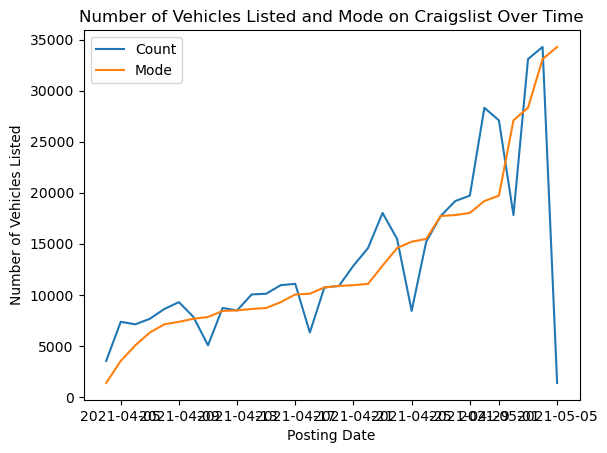

In [31]:
# Group the data by posting date and count the number of vehicles listed on each day.
data_grouped = data.groupby("posting_date").size().reset_index(name="count")

# Sort the data by posting date.
data_grouped = data_grouped.sort_values(by="posting_date")

# Calculate the mode of the daily vehicle listing counts.
# The mode is the most frequent value.
data_grouped["mode"] = data_grouped["count"].mode()

# Create a time-series chart of the number of vehicles listed and the mode over time.
plt.plot(data_grouped["posting_date"], data_grouped["count"], label="Count")
plt.plot(data_grouped["posting_date"], data_grouped["mode"], label="Mode")

# Set the title and axis labels.
plt.title("Number of Vehicles Listed and Mode on Craigslist Over Time")
plt.xlabel("Posting Date")
plt.ylabel("Number of Vehicles Listed")

# Add a legend.
plt.legend()

# Show the plot.
plt.show()